YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
PATH='../data/'
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

col = 'YearRemodAdd'
col_train = train[col]
col_test = test[col]

In [3]:
train[col].dtype

dtype('int64')

In [5]:
col_train.isnull().sum()

0

In [4]:
col_train.nunique()

61

In [5]:
col_train.value_counts(dropna=False)

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

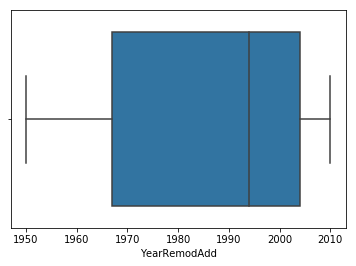

In [6]:
sns.boxplot(col_train)

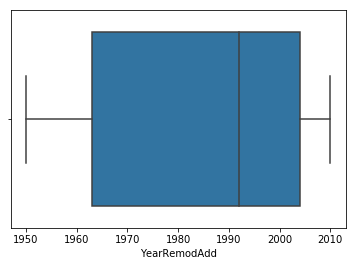

In [7]:
sns.boxplot(col_test)

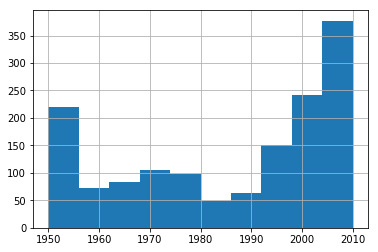

In [8]:
col_train.hist()

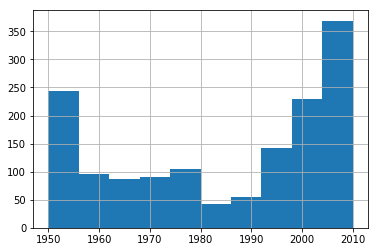

In [9]:
col_test.hist()

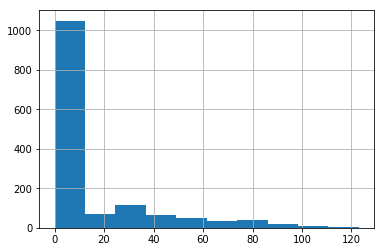

In [12]:
train['RemodAfter'] = train['YearRemodAdd'] - train['YearBuilt']
train['RemodAfter'].hist()

### SalePrice according to MSSubClass

In [30]:
cols = ['MSSubClass', 'SalePrice']
aggr = {
    'SalePrice': {
        'avg_price': 'mean'
    }
}
groupby = train[cols].groupby('MSSubClass').mean()
groupby.sort_values('SalePrice')

,SalePrice
MSSubClass,
30,95829.724638
180,102300.000000
45,108591.666667
190,129613.333333
90,133541.076923
160,138647.380952
50,143302.972222
85,147810.000000
40,156125.000000


### Write a transformer to one-hot encode this feature

In [8]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
import category_encoders as ce

cols = ['YearBuilt', 'YearRemodAdd', 'SalePrice']

class RemodAfterAdding(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['RemodAfter'] = X['YearRemodAdd'] - X['YearBuilt']
        return X
        
# test
pipe = Pipeline([
    ('transformer', RemodAfterAdding())
])
transformed = pipe.transform(train[cols])
transformed.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,YearBuilt,YearRemodAdd,SalePrice,RemodAfter
0,2003,2003,208500,0
1,1976,1976,181500,0
2,2001,2002,223500,1
3,1915,1970,140000,55
4,2000,2000,250000,0


not using ColumnTransformer from sklearn.compose because it does not return dataframe but ndarray